# 冻手实验室3.18-NEU校园卡查询中心模拟登陆与数据获取

## 1.本次将学到

- 如何利用浏览器的开发者功能来了解一个页面
- 用与发送http请求的python库-[requests](http://docs.python-requests.org/zh_CN/latest/user/quickstart.html)
- 用与解析网页的python库-[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.zh.html)

## 2.环境配置

**强烈建议大家提前配置好环境**
- python3
- python包：
    - requests   安装方法：`pip install requests`  
    - BeautifulSoup [安装方法见此处](https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.zh.html#id5)
    - jupyter notebook  [安装方法见此处](http://jupyter.org/install)
    - matplotlib 安装方法：`pip install -U matplotlib`  或者查看[官方教程](https://matplotlib.org/users/installing.html)
- **推荐使用**chrome或者Firefox浏览器


## 3.导入需要用到的包

In [1]:
import requests
from bs4 import BeautifulSoup
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## 4.具体步骤

- 4.1模拟登录
    - 4.1.1获取登陆页面
    - 4.1.2获取验证码
    - 4.1.3登录

- 4.2数据查询与获取
    - 4.2.1 获取查询页面
    - 4.2.2 进行查询
    - 4.2.3 结果翻页





### 4.1.1获取登陆页面

这里，我们先获取尝试利用request来发送get请求登录页面。

为了保持登录的状态，我们需要用到requests的session对象，他可以自动地为我们保存cookies。而一般网站会利用cookies来保存用户的状态。

我们还将使用BeautifulSoup来解析此页面

In [2]:
session = requests.Session()

In [3]:
url_login='http://ecard.neu.edu.cn/SelfSearch/Login.aspx'
resp_login_page = session.get(url=url_login)

In [4]:
#查看获取到网页内容
print(resp_login_page.text)


<!DOCTYPE html PUBLIC "-//W3C//Dtd XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/Dtd/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head id="Head1"><title>
	
        一卡通自助查询
        --欢迎登录
</title><meta http-equiv="Pragma" content="no-cache" /><meta http-equiv="Cache-Control" content="no-cache" /><meta http-equiv="Expires" content="0" /><link href="css/login.css" rel="stylesheet" type="text/css" />
    <style type="text/css">
        .schoolName
        {
            margin-top: 5px;
            width: 320px;
            display: none;
            text-align: center;
            color: Red;
        }
        /* 遮罩层 */
        .overlay { background: #000000; opacity: .50;filter:Alpha(Opacity=50); }

        .overlay-container{position:absolute;z-index:2000;}
        .overlay-loading{background:url(images/loading2.gif) no-repeat center center; width:124px; height:124px; text-align:center; line-height:124px; vertical-align:middle; color:White; font-size

以上内容，我们可以用正则表达式来找出我们想要的信息，不过太难了。让我们来尝尝神奇的BeautifulSoup😎

第一个参数是网页的内容，第二个参数是所用的解析器，‘html.parser’是python标准库中自带的。

这样我们就获得了一个文档对象。

In [5]:
soup_login_page = BeautifulSoup(resp_login_page.text, 'html.parser')

通过这个文档对象可以轻易地获取我们想获取的内容。

以下代码找到了页面中的title标签。

关于find方法的更多介绍，你可以[看这里](https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.zh.html#find)

- find返回第一个结果。
- find_all方法会返回一个储存了全部结果的list

In [6]:
soup_login_page.find('title')

<title>
	
        一卡通自助查询
        --欢迎登录
</title>

也可以直接用id来搜索

In [7]:
soup_login_page.find(id='one1')

<li class="hover" id="one1" onmouseover="setTab('one',1,2)"><a href="#">
                                                用户登录</a> </li>

那你来试试看，获取VIEWSTATE和EVENTVALIDATION的值。

提示：他们的值写的html里面，并且有特定的id。
标签的属性，可以通过`xxx['abc']`来获取

In [8]:
VIEWSTATE= soup_login_page.find(id = '__VIEWSTATE')['value']
EVENTVALIDATION= soup_login_page.find(id = '__EVENTVALIDATION')['value']
print(VIEWSTATE+'\n')
print(EVENTVALIDATION)

/wEPDwUKMTM4OTU1Nzc4NA8WAh4Hc3lzSW5mbzKSBQABAAAA/////wEAAAAAAAAADAIAAABPTmV3Y2FwZWMuVW5pdmVyc2FsU1MuRFRPLCBWZXJzaW9uPTEuMC4wLjAsIEN1bHR1cmU9bmV1dHJhbCwgUHVibGljS2V5VG9rZW49bnVsbAwDAAAAUk5ld2NhcGVjLlVuaXZlcnNhbFNTLkVudGl0eSwgVmVyc2lvbj0xLjAuMC4wLCBDdWx0dXJlPW5ldXRyYWwsIFB1YmxpY0tleVRva2VuPW51bGwFAQAAAChOZXdjYXBlYy5Vbml2ZXJzYWxTUy5EVE8uRFRPX09VVF9TWVNJTkZPBAAAAB48T1BFUkFUSU9OTU9ERT5rX19CYWNraW5nRmllbGQbRFRPX1dTUnVuUmVzdWx0K19yZXN1bHRDb2RlGkRUT19XU1J1blJlc3VsdCtfcmVzdWx0TXNnHURUT19XU1J1blJlc3VsdCtfRWNhcmRWZXJzaW9uBAEBBDNOZXdjYXBlYy5Vbml2ZXJzYWxTUy5FbnRpdHkuRW51bS5FbnVtX09QRVJBVElPTk1PREUDAAAAMk5ld2NhcGVjLlVuaXZlcnNhbFNTLkVudGl0eS5FbnVtLkVudW1fRWNhcmRWZXJzaW9uAwAAAAIAAAAF/P///zNOZXdjYXBlYy5Vbml2ZXJzYWxTUy5FbnRpdHkuRW51bS5FbnVtX09QRVJBVElPTk1PREUBAAAAB3ZhbHVlX18ACAMAAAABAAAABgUAAAABMQYGAAAADOaJp+ihjOaIkOWKnwX5////Mk5ld2NhcGVjLlVuaXZlcnNhbFNTLkVudGl0eS5FbnVtLkVudW1fRWNhcmRWZXJzaW9uAQAAAAd2YWx1ZV9fAAgDAAAAQAAAAAsWAgIDD2QWBAIDDw8WAh4HVmlzaWJsZWhkFgJmDw8WAh4EVGV4dAUIMDAwMDAwMDBkZAILDw8WBB4LTmF2

### 4.1.2获取验证码
通常你看到的网页中的图片，在html中只是写了一个图片的链接。
我们的验证码也需要从一个图片获得。


In [9]:
# 获得验证码的url，你需要写一行,提示：你可能需要随机数函数
url_captcha= 'http://ecard.neu.edu.cn/SelfSearch/validateimage.ashx?' + str(random.random())
print(url_captcha)
#向该链接发送get请求，并获取Response对象，你需要写一行
resp_captcha = session.get(url=url_captcha)

http://ecard.neu.edu.cn/SelfSearch/validateimage.ashx?0.6539948886334391


将图片保存。
[关于二进制的响应内容](http://docs.python-requests.org/zh_CN/latest/user/quickstart.html#id4)

In [10]:
with open('captcha.gif', 'wb') as f:
    f.write(resp_captcha.content)
    f.close()

读取图片文件，并显示。

[教程看这里](https://matplotlib.org/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py)

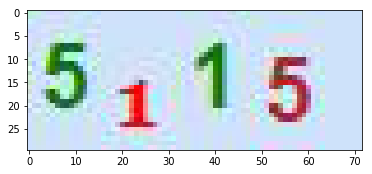

In [11]:
img = mpimg.imread('captcha.gif')
plt.imshow(img)

In [13]:
#把看到的验证码填到这里,注意是字符串形式哟
captcha= '5115'

### 4.1.3登录

登录需要向服务器发送一个post请求，
你需要先获取所需的链接和post请求的请求体内容

In [14]:
userName = ''
passwd= ''

url_login = 'http://ecard.neu.edu.cn/SelfSearch/Login.aspx'
postdata = {
    '__EVENTVALIDATION': EVENTVALIDATION,
    '__VIEWSTATE': VIEWSTATE,
    '__EVENTTARGET': 'btnLogin',
    'txtUserName': userName,
    'txtPassword': passwd,
    'txtVaildateCode': captcha,
    'hfIsManager':0
}

In [15]:
loginresponse = session.post(url=url_login, data=postdata)
print('跳转的链接：', loginresponse.url)

跳转的链接： http://ecard.neu.edu.cn/SelfSearch/Index.aspx


如果返回的是'http://ecard.neu.edu.cn/SelfSearch/Index.aspx' 则说明我们已经登录成功并且跳转到了登陆后的页面。

来看看你的证件照吧！

In [16]:
# 自己去找照片的url
url_profile_photo='http://ecard.neu.edu.cn/SelfSearch/User/Photo.ashx'

#发送get请求
resp_profile_photo = session.get(url=url_profile_photo)

#你可以看请求对象的url属性值十分为http://ecard.neu.edu.cn/SelfSearch/User/Photo.ashx 来判断是否是登录成功的。因为要是没成功，回跳转到登录页面
print('跳转链接', resp_profile_photo.url)

#保存图片
with open('userPic.jpg', 'wb') as f:
    f.write(resp_profile_photo.content)
    f.close()


跳转链接 http://ecard.neu.edu.cn/SelfSearch/User/Photo.ashx


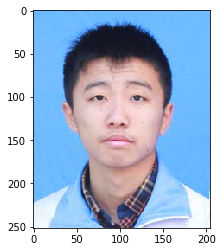

In [17]:
#查看图片，自己写
img = mpimg.imread('userPic.jpg')
plt.imshow(img)


### 4.2数据查询与获取

### 4.2.1 获取查询页面

4.2.3 结果翻页

In [18]:
# 自己找消费记录是向哪个url请求的
url_consumeInfo= 'http://ecard.neu.edu.cn/SelfSearch/User/ConsumeInfo.aspx'

#获取页面
consume_response0=session.get(url_consumeInfo)
consume_soup = BeautifulSoup(consume_response0.text, 'html.parser')

#解析出以下两个变量的值
VIEWSTATE= consume_soup.find(id='__VIEWSTATE')['value']
EVENTVALIDATION= consume_soup.find(id='__EVENTVALIDATION')['value']
print(VIEWSTATE)

/wEPDwUINDEyMzA5NDkPFgIeCFNvcnRUeXBlBQNBU0MWAmYPZBYCAgMPZBYCAgMPZBYCAgQPPCsAEQIADxYEHgtfIURhdGFCb3VuZGceC18hSXRlbUNvdW50ZmQBEBYAFgAWABYCZg9kFgJmD2QWAgIBD2QWAgIBDw8WBB4IQ3NzQ2xhc3MFClNvcnRCdF9Bc2MeBF8hU0ICAmRkGAEFImN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkZ3JpZFZpZXcPPCsADAEIZmS1nGD/GSue8PpoytFqShSdqUF6ljUyRQIwkBYf3H/1Cg==


### 4.2.2 进行查询与数据解析

In [19]:
#构造postdata
postdata_consume = {
    '__EVENTTARGET':'',
    '__EVENTARGUMENT':'',
    '__VIEWSTATE': VIEWSTATE,
    '__EVENTVALIDATION': EVENTVALIDATION,
    'ctl00$ContentPlaceHolder1$rbtnType': 0,
    'ctl00$ContentPlaceHolder1$txtStartDate': '2018-03-11',
    'ctl00$ContentPlaceHolder1$txtEndDate': '2018-03-18',
    'ctl00$ContentPlaceHolder1$btnSearch': '查  询',
}

resp_consume_1=session.post(url_consumeInfo,data=postdata_consume)
soup_consume_1 = BeautifulSoup(resp_consume_1.text, 'html.parser')


In [21]:
#找到显示交易信息的table
list_page = soup_consume_1.find(id='ContentPlaceHolder1_AspNetPager1').find_all('a')
a = int(list_page[len(list_page) - 3].text)

3

In [198]:
#想办法利用find_all方法，把每一行的数据提出来，再把一行中的对应内容提取出来
#提示：对于一个文档对象  可以利用abc.text 来获取其文字内容
#提示：关于HTML的table，可以看这里http://www.w3school.com.cn/tags/tag_table.asp




### 4.2.3 翻页（自己完成）

1. 探索翻页实现的机制
2. 构造对应的请求数据实现翻页

In [224]:
VIEWSTATE= soup_consume_1.find(id='__VIEWSTATE')['value']
EVENTVALIDATION= soup_consume_1.find(id='__EVENTVALIDATION')['value']
postdata_consume2 = {
    '__EVENTTARGET':'ctl00$ContentPlaceHolder1$AspNetPager1',
    '__EVENTARGUMENT':'2',
    '__VIEWSTATE': VIEWSTATE,
    '__EVENTVALIDATION': EVENTVALIDATION,
    'ctl00$ContentPlaceHolder1$rbtnType': 0,
    'ctl00$ContentPlaceHolder1$txtStartDate': '2018-03-11',
    'ctl00$ContentPlaceHolder1$txtEndDate': '2018-03-18',
}
resp_consume_2= session.post(url_consumeInfo,data=postdata_consume2)
soup_consume_2 = BeautifulSoup(resp_consume_2.text, 'html.parser')

In [225]:
info_table= soup_consume_2.find_all('table')[1]
for line in info_table.find_all('tr'):
    for thh in line.find_all('th'):
        print(thh.text)
    for tdd in line.find_all('td'):
        print(tdd.text)


操作时间

科目描述
钱包交易金额
钱包余额
操作员
工作站
终端名称

2018/3/15 11:57:18

餐费支出
4.50
162.41
虚拟职员
餐饮采集工作站
水果店65号（原面包）

2018/3/15 16:31:28

餐费支出
0.60
157.31
虚拟职员
餐饮采集工作站
浑南一楼27#

2018/3/15 16:32:16

餐费支出
4.50
157.91
虚拟职员
餐饮采集工作站
浑南一楼24#

2018/3/16 11:51:23

餐费支出
12.00
145.31
虚拟职员
餐饮采集工作站
浑南三楼130#

2018/3/16 18:13:10

餐费支出
11.00
134.31
虚拟职员
餐饮采集工作站
浑南一楼49#

2018/3/17 12:05:08

淋浴支出
0.50
133.81
虚拟职员
浴室采集工作站
男浴池2楼35#

2018/3/17 12:07:38

淋浴支出
0.50
133.31
虚拟职员
浴室采集工作站
男浴池2楼35#

2018/3/17 12:10:08

淋浴支出
0.50
132.81
虚拟职员
浴室采集工作站
男浴池2楼35#

2018/3/17 12:13:32

淋浴支出
0.50
132.31
虚拟职员
浴室采集工作站
男浴池2楼35#

2018/3/17 12:31:44

餐费支出
8.00
124.31
虚拟职员
餐饮采集工作站
浑南三楼148#


In [228]:
import pandas as pd  

In [234]:
# a = ['one','two','three']  
# b = [1,2,3]  
# save = pd.DataFrame({'english':a,'number':b})  
# save.to_csv('b.txt',index=False,sep=',')  

In [236]:
info_table= soup_consume_2.find_all('table')[1]
list1 = []
list2 = []
for line in info_table.find_all('tr'):
    for thh in line.find_all('th'):
        list1.append(thh.text)
    for tdd in line.find_all('td'):
        list2.append(tdd.text)

In [252]:
list1[0] = list1[0].strip('\n')

In [253]:
time = []
detail = []
money = []
balance = []
operator = []
workstation = []
terminal = []   
for i in range(0,10):
    list2[i*7] = list2[i*7].strip('\n')
    time.append(list2[i*7])
    detail.append(list2[i*7+1])
    money.append(list2[i*7+2])
    balance.append(list2[i*7+3])
    operator.append(list2[i*7+4])
    workstation.append(list2[i*7+5])
    terminal.append(list2[i*7+6])

In [264]:
data = {list1[0]:time,list1[1]:detail,list1[2]:money,list1[3]:balance,list1[4]:operator,list1[5]:workstation,list1[6]:terminal}
frame = pd.DataFrame(data)
frame.to_csv('result.txt',index=False,sep=',')  
frame

,工作站,操作员,操作时间,科目描述,终端名称,钱包交易金额,钱包余额
0,餐饮采集工作站,虚拟职员,2018/3/15 11:57:18,餐费支出,水果店65号（原面包）,4.50,162.41
1,餐饮采集工作站,虚拟职员,2018/3/15 16:31:28,餐费支出,浑南一楼27#,0.60,157.31
2,餐饮采集工作站,虚拟职员,2018/3/15 16:32:16,餐费支出,浑南一楼24#,4.50,157.91
3,餐饮采集工作站,虚拟职员,2018/3/16 11:51:23,餐费支出,浑南三楼130#,12.00,145.31
4,餐饮采集工作站,虚拟职员,2018/3/16 18:13:10,餐费支出,浑南一楼49#,11.00,134.31
5,浴室采集工作站,虚拟职员,2018/3/17 12:05:08,淋浴支出,男浴池2楼35#,0.50,133.81
6,浴室采集工作站,虚拟职员,2018/3/17 12:07:38,淋浴支出,男浴池2楼35#,0.50,133.31
7,浴室采集工作站,虚拟职员,2018/3/17 12:10:08,淋浴支出,男浴池2楼35#,0.50,132.81
8,浴室采集工作站,虚拟职员,2018/3/17 12:13:32,淋浴支出,男浴池2楼35#,0.50,132.31
9,餐饮采集工作站,虚拟职员,2018/3/17 12:31:44,餐费支出,浑南三楼148#,8.00,124.31
